# Working with time series, frequency series, and unit conversion

In this notebook, we show some of the most useful features of the [timeseries](../series.rst) module. To do so, we will analyze a fake gravitational-wave signal. We will also show the [frequencyseries](../series.rst) module and the [unitconv](../unitconv.rst) modules.

First, let's generate this signal. 

(This notebook is meant to be converted in Sphinx documentation and not used directly.)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from kuibit import timeseries as ts
from kuibit import series
from kuibit import unitconv as uc
from kuibit.gw_utils import luminosity_distance_to_redshift

%matplotlib inline

In [2]:
t = np.linspace(0, 20, 5000)
y = np.sin(t)

# Generate a TimeSeries by providing the times and the values of the series
gw = ts.TimeSeries(t, y)

To access the times and the values, use ``gw.t`` and ``gw.y``. You can also iterate over the series with a for loop yielding the elements `(t, y)` at each iteration of the loop. For example.

In [3]:
for tt, yy in gw:
    print(tt, yy)

0.0 0.0
0.004000800160032006 0.004000789486971321
0.008001600320064013 0.008001514935783532
0.012002400480096018 0.012002112309302542
0.016003200640128026 0.016002517572444287
0.020004000800160033 0.020002666693199687
0.024004800960192037 0.024002495643659576
0.028005601120224044 0.028001940401039562
0.03200640128025605 0.03200093694870479
0.03600720144028806 0.03599942127719461
0.040008001600320066 0.03999732938524717
0.04400880176035207 0.0439945972808238
0.048009601920384073 0.04799116098213332
0.05201040208041608 0.05198695651865616
0.05601120224044809 0.055981919932168285
0.060012002400480095 0.059975987277764924
0.0640128025605121 0.06396909462488413
0.0680136027205441 0.06796117805833003
0.07201440288057612 0.07195217367929596
0.07601520304060812 0.07594201760638712
0.08001600320064013 0.07993064597664322
0.08401680336067213 0.08391799494656059
0.08801760352070415 0.08790400069311417
0.09201840368073615 0.09188859941477902
0.09601920384076815 0.09587172733255157
0.10002000400080

-0.6969889896108455
3.9167833566713344 -0.6998523049149701
3.9207841568313664 -0.7027044181167592
3.9247849569913984 -0.7055452835642037
3.9287857571514304 -0.70837485578533
3.9327865573114624 -0.7111930894889282
3.9367873574714944 -0.7139999395652773
3.9407881576315265 -0.7167953610868667
3.9447889577915585 -0.7195793093091156
3.9487897579515905 -0.7223517396710895
3.9527905581116225 -0.7251126077962124
3.9567913582716545 -0.727861869492979
3.9607921584316865 -0.73059948075566
3.9647929585917185 -0.7333253977650076
3.9687937587517506 -0.7360395768889568
3.9727945589117826 -0.7387419746833238
3.9767953590718146 -0.7414325478925008
3.9807961592318466 -0.7441112534501492
3.984796959391878 -0.746778048479888
3.98879775955191 -0.7494328902959818
3.992798559711942 -0.7520757364040217
3.996799359871974 -0.7547065445016072
4.000800160032006 -0.7573252724790227
4.004800960192038 -0.7599318784199115
4.00880176035207 -0.7625263206019469
4.012802560512102 -0.7651085574975001
4.016803360672134 -0.

0.9809257347347187
8.053610722144429 0.9801401992279969
8.05761152230446 0.9793389752242343
8.061612322464493 0.9785220755481271
8.065613122624525 0.9776895132752824
8.069613922784557 0.9768413017320088
8.073614722944589 0.9759774544951031
8.07761552310462 0.975097985391633
8.081616323264653 0.9742029084987154
8.085617123424685 0.9732922381432919
8.089617923584717 0.9723659889018987
8.093618723744749 0.9714241756004337
8.09761952390478 0.9704668133139192
8.101620324064813 0.9694939173662599
8.105621124224845 0.968505503329999
8.109621924384877 0.9675015870260675
8.113622724544909 0.9664821845235319
8.11762352470494 0.9654473121393364
8.121624324864973 0.9643969864380426
8.125625125025005 0.9633312242315631
8.129625925185037 0.9622500425788936
8.133626725345069 0.9611534587858388
8.137627525505101 0.9600414904047365
8.141628325665133 0.9589141552341757
8.145629125825165 0.957771471318712
8.149629925985197 0.9566134569485794
8.153630726145229 0.9554401306593961
8.157631526305261 0.954251

12.194438887777556 -0.3634157576651419
12.198439687937588 -0.35968560541474115
12.20244048809762 -0.3559496958996546
12.206441288257652 -0.35220808891827166
12.210442088417684 -0.3484608443601776
12.214442888577716 -0.3447080222051949
12.218443688737748 -0.34094968252242325
12.22244448889778 -0.33718588546927786
12.226445289057812 -0.3334166912905268
12.230446089217844 -0.3296421603173265
12.234446889377876 -0.3258623529662562
12.238447689537908 -0.3220773297383509
12.24244848969794 -0.3182871512181327
12.246449289857972 -0.3144918780726416
12.250450090018004 -0.31069157105046386
12.254450890178036 -0.30688629098076
12.258451690338068 -0.30307609877229086
12.2624524904981 -0.29926105541244313
12.266453290658133 -0.2954412219662526
12.270454090818165 -0.2916166595754272
12.274454890978197 -0.28778742945736807
12.278455691138229 -0.28395359290418976
12.28245649129826 -0.2801152112817391
12.286457291458293 -0.2762723460286133
12.290458091618323 -0.2724250586551776
12.294458891778355 -0.26

16.475295059011803 -0.6942172272256231
16.479295859171835 -0.6970913017031715
16.483296659331867 -0.6999542182720527
16.4872974594919 -0.7028059311073347
16.49129825965193 -0.7056463945634164
16.495299059811963 -0.7084755631747588
16.499299859971995 -0.7112933916566124
16.503300660132027 -0.7140998349057421
16.50730146029206 -0.7168948480011493
16.51130226045209 -0.7196783862047906
16.515303060612123 -0.7224504049622943
16.519303860772155 -0.7252108599036731
16.523304660932187 -0.7279597068440345
16.52730546109222 -0.7306969017842887
16.53130626125225 -0.7334224009118514
16.535307061412283 -0.7361361606013466
16.539307861572315 -0.7388381374153037
16.543308661732347 -0.7415282881048536
16.54730946189238 -0.7442065696104206
16.55131026205241 -0.7468729390624116
16.555311062212443 -0.7495273537819025
16.559311862372475 -0.7521697712813211
16.563312662532507 -0.7548001492651272
16.56731346269254 -0.7574184456304897
16.57131426285257 -0.7600246184679607
16.575315063012603 -0.76261862606214

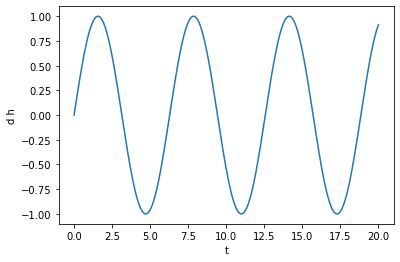

In [4]:
def plot(ser, lab1="d h", lab2="t", *args, **kwargs):
    """Plot Series ser with labels"""
    plt.ylabel(lab1)
    plt.xlabel(lab2)
    plt.plot(ser, *args, **kwargs)
    
plot(gw)

Let's make this more interesting: we square the signal and add Gaussian noise. [TimeSeries](../timeseries_ref.html#kuibit.timeseries.TimeSeries) support directly using all the basic mathematical operations in Python and NumPy, so we can easily square the signal and add another TimeSeries to it.

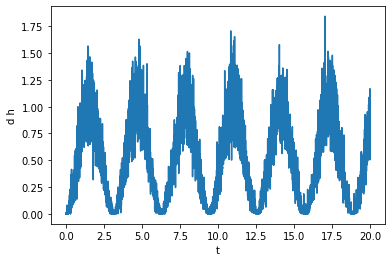

In [5]:
noise = np.random.normal(0, 0.1, len(gw))  # Here we used len() on the TimeSeries
noise_ts = ts.TimeSeries(t, noise)

gw += noise_ts
gw **= 2

plot(gw)

To analyze this signal, first we will smooth it. To do that, we will use the [savgol_smooth_time](../timeseries_ref.html#kuibit.timeseries.TimeSeries.savgol_smooth_time) method, which is a generalized "running average" filter. This method requires length of time over which we want to smooth the data.

In [TimeSeries](../timeseries_ref.html#kuibit.timeseries.TimeSeries) there are always two different methods to do the same task, one with imperative verb (e.g., smooth), and the other with the past tense (e.g., smoothed). The first modifies the data, the second returns a new `TimeSeries` with the operation applied. Here, we will find what smoothing length to use by trial and error, so we will use the second method. 

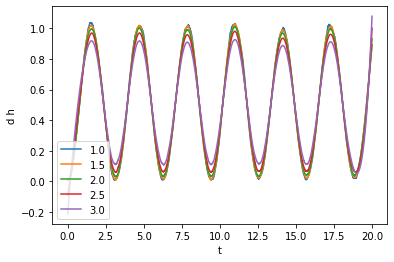

In [6]:
tsmooth = np.linspace(1, 3, 5)

for tsm in tsmooth:
    smoothed = gw.savgol_smoothed_time(tsm)
    plot(smoothed, label=tsm)
plt.legend()

From visual inspection it looks like that ``tsmooth = 1.5`` will work yield a clean series faithful to the original one.

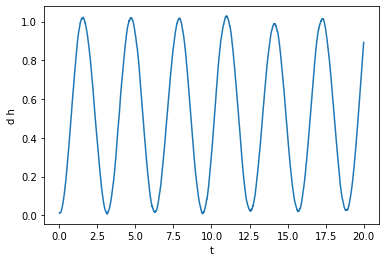

In [7]:
gw.savgol_smooth_time(1.5)
plot(gw)

Next, for fun, we can compute integrals and derivatives. For instance, we can compute what is the integral from 5 to 10.

The integral from 5 to 10 is 2.1989


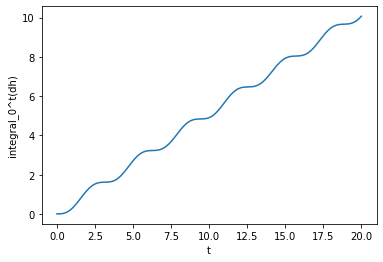

In [8]:
gw_int = gw.integrated()
a = 5
b = 10
print(f"The integral from {a} to {b} is {gw_int(b) - gw_int(a):.4f}")
plot(gw_int, lab1="integral_0^t(dh)")

Here, we showed a very powerful feature of `TimeSeries`: you can call them on a specific time (as we did we ``gw_int(b)``). This is done using splines to interpolate to the points that are not available. Splines can also be used to take derivatives. Alternatively, one can simply take the finite (central) difference. Let's see what's the derivative of ``gw`` using splines and finite difference.

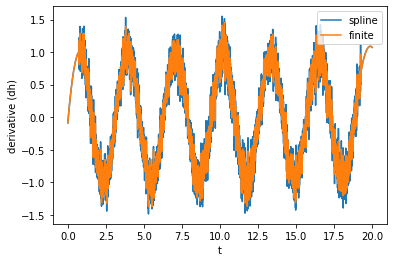

In [9]:
gw_spline_der = gw.spline_differentiated()
gw_numer_der = gw.differentiated()

plot(gw_spline_der, label='spline')
plot(gw_numer_der, lab1="derivative (dh)", label='finite')
plt.legend()

Clearly, derivatives will be noisier than the actual data, so often it is convenient to smooth them out as shown before.

TimeSeries support complex signals. Now, we will create one using `gw` itself. We will copy `gw`, time-shift it, find the common time interval with the original `gw`, and use that as a the imaginary part.

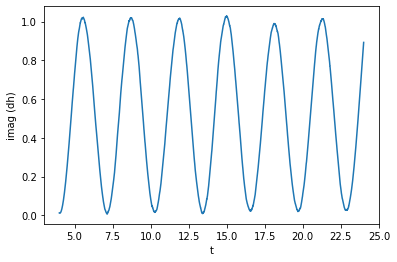

In [10]:
gw_imag = gw.copy()  # It is important to deep copy the object
gw_imag.time_shift(4)

plot(gw_imag, lab1 ="imag (dh)")

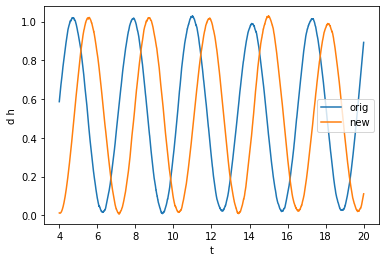

In [11]:
gw, gw_imag = series.sample_common([gw, gw_imag], resample=True)  # Resampling to common times

plot(gw, label="orig")
plot(gw_imag, label="new")
plt.legend()

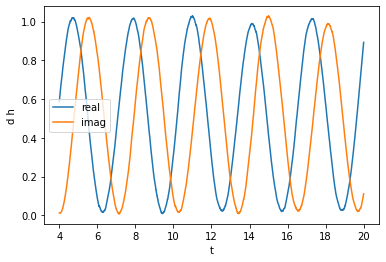

In [12]:
gw_complex = ts.TimeSeries(gw.t, gw.y + 1j * gw_imag.y)

plot(gw_complex.real(), label="real")
plot(gw_complex.imag(), label="imag")
plt.legend()

We can also compute the phase and absolute value. In particular, we will compute the unfolded phase (no wrapping over $2\pi$)

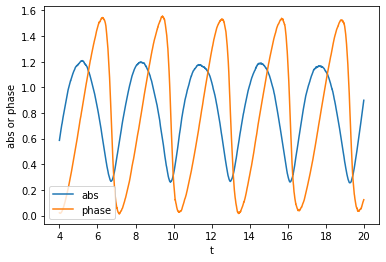

In [13]:
plot(gw_complex.abs(), label='abs')
plot(gw_complex.unfolded_phase(), lab1="abs or phase", label='phase')
plt.legend()

Here, the unfolded phase looks a little bit unusual. This is because we made up the signal.

We can also compute the frequency of the phase, which we can directly smooth.

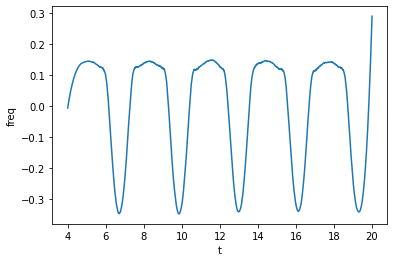

In [14]:
plot(gw_complex.phase_frequency(tsmooth=1.5), lab1="freq")

Next, we will take a Fourier transform. Before, let's pretend that the signal was in geometrized units (as in simulations), and let's make it physical assuming a scale of $M = 1 M_\odot$. For that, use the [unitconv](../unitconv.rst) module. We define a CU object that knows how to convert units.

In [15]:
CU = uc.geom_umass_msun(1) 

# How to convert from geometrized length to physical length?
# Simply multiply times CU.length. Let's check that it is 1.477 km
CU.length  # m

1476.6436994724972

Now we rescale `gw`, assuming that `y` is strain times distance (as usually is). Let's assume a distance of 500 Mpc.

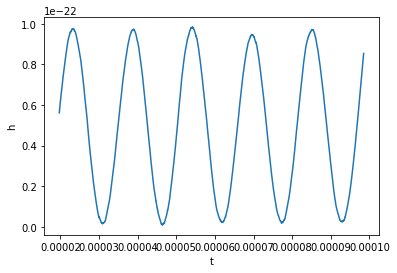

In [16]:
d_Mpc = 500

# inverse = True means from geometrized to physical
gw_physical = gw_complex.time_unit_changed(CU.time, inverse=True)  

gw_physical *= CU.length  # dh -> dh physical
# Now just the strain, since we assume a distance
gw_physical /= (d_Mpc * uc.MEGAPARSEC_SI)

# We have to manually add the redshift
gw_physical.redshifted(luminosity_distance_to_redshift(d_Mpc))

plot(gw_physical.real(), lab1="h")

Okay, now before taking the Fourier transform, we will remove the mean and window our signal. A Tukey window will work.

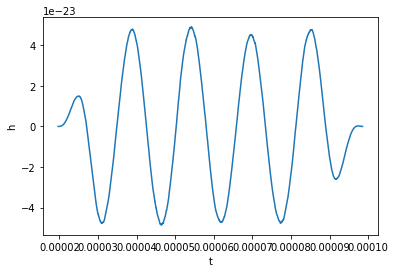

In [17]:
gw_physical.mean_remove()
gw_physical.tukey_window(0.3)
plot(gw_physical.real(), lab1="h")

Finally, we can take the Fourier transform. This is easy to do:

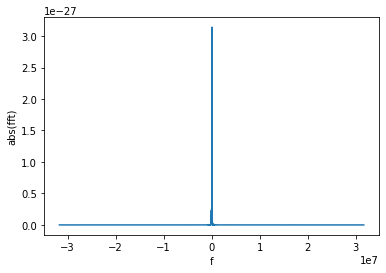

In [18]:
gw_fft = gw_physical.to_FrequencySeries()

# Plotting the amplitude of the Fourier transform
plot(gw_fft.abs(), lab1="abs(fft)", lab2="f")

The new object is a `FrequencySeries`. It is very similar to a `TimeSeries` and it shares several properties, methods, and features. 

Let's restrict to only positive frequencies close to zero.

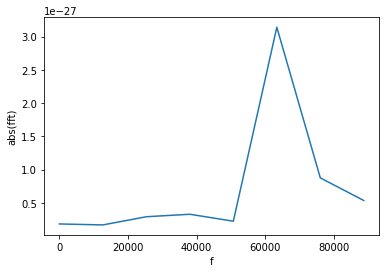

In [19]:
gw_fft.crop(0, 1e5)
plot(gw_fft.abs(), lab1="abs(fft)", lab2="f")

We can find the frequency of that peak! For this, we find all the peaks with amplitude larger than 1e-27.

Frequency: 64229.81


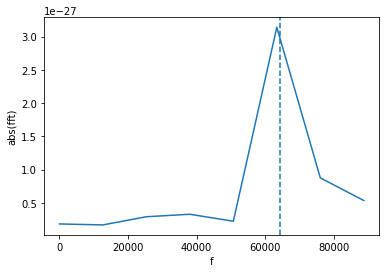

In [20]:
f_peak = gw_fft.peaks_frequencies(1e-27)[0]

print(f"Frequency: {f_peak:.2f}")
plot(gw_fft.abs(), lab1="abs(fft)", lab2="f")
plt.axvline(f_peak, ls = 'dashed')

The line is not on the maximum because we use a quadratic interpolation to find a more accurate location of the peak.

Sometimes, it is useful to ignore some data (or example, when we know that the data is invalid). `Series` objects support _masks_ to mark the points we want to ignore. Most functions work transparently with masks: for example, if you ask for the mean of a `Series`, the masked point will be ignored. Other functions do not support masks (most notably, splines). In that case, it is best to completely remove the masked points and work with clean data.

In [21]:
# Let's mask all the point in the spectrum with value larger than 1e-27

spectrum = gw_fft.abs()

print(f"Maximum without mask {spectrum.max():.3e}")

# Apply mask
spectrum.mask_greater(1e-27)

print(f"Maximum with mask {spectrum.max():.3e}")

print(f"Length with mask {len(spectrum)}")

# Remove points
spectrum.mask_remove()

print(f"Length after having removed the masked points {len(spectrum)}")

Maximum without mask 3.140e-27
Maximum with mask 8.744e-28
Length with mask 8
Length after having removed the masked points 7
